In [1]:
# Version Check
import sys
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL
import pandas as pd
import numpy as np
import scipy
print("python", sys.version)
print("tensorflow", tf.__version__)
print("tensorflow-datasets", tfds.__version__)
print("Pillow", PIL.__version__)
print("pandas", pd.__version__)
print("numpy", np.__version__)
print("scipy", scipy.__version__)
print()
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("Built with GPU support:", tf.test.is_built_with_gpu_support())
print()

python 3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]
tensorflow 2.6.2
tensorflow-datasets 4.4.0
Pillow 8.3.2
pandas 1.3.3
numpy 1.19.5
scipy 1.7.1

Num GPUs Available: 1
Built with CUDA: True
Built with GPU support: True



## Tensorflow Hub (inception_resnet_v2)

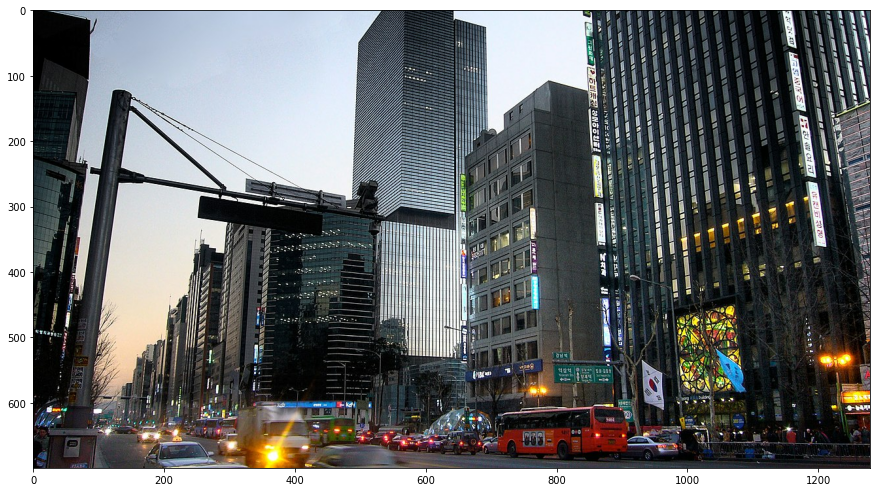

In [19]:
# Sample image

import tensorflow_hub as tfhub 

img_path = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Gangnam_Seoul_January_2009.jpg/1280px-Gangnam_Seoul_January_2009.jpg'
img = tf.keras.utils.get_file(fname='gangnam', origin=img_path)
img = tf.io.read_file(img)                           # file object -> str
img = tf.image.decode_jpeg(img, channels=3)          # str -> number(unit8) tensor
img = tf.image.convert_image_dtype(img, tf.float32)  # 0~1 normalization 

import matplotlib.pylab as plt

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [21]:
# Check shape 
print(img.shape)

# Add a batch size dimension
img_input = tf.expand_dims(img, 0)  
print(img_input.shape)

(700, 1280, 3)
(1, 700, 1280, 3)


In [22]:
# Model
model = tfhub.load("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1")

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [24]:
# Check model signature
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x1F9F66FA2B0>}))

In [26]:
obj_detector = model.signatures['default']
obj_detector

<ConcreteFunction pruned(images) at 0x1F9F66FA2B0>

In [29]:
# Inference
result = obj_detector(img_input)
result.keys()

dict_keys(['detection_class_entities', 'detection_class_names', 'detection_class_labels', 'detection_boxes', 'detection_scores'])

In [31]:
# How many objects detected?
len(result['detection_scores'])

100

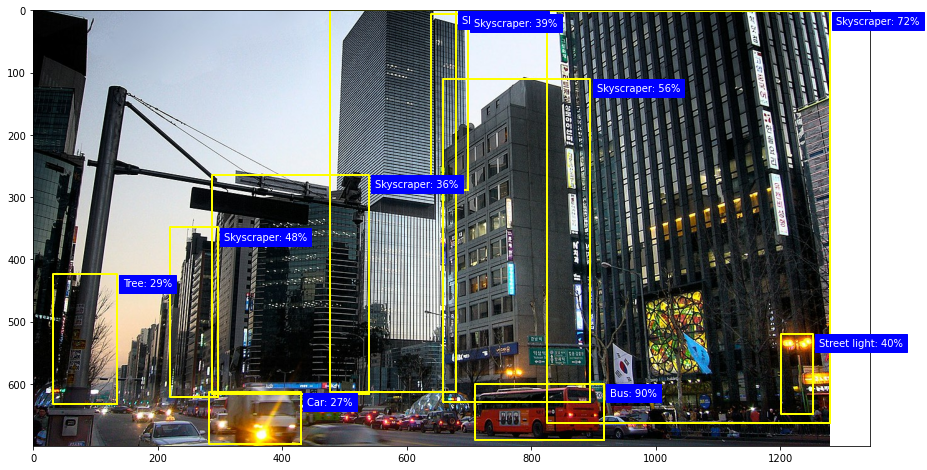

In [49]:
# Variables
boxes = result['detection_boxes']            # Bounding box coordiates
labels = result['detection_class_entities']  # Detection predictions
scores = result['detection_scores']          # Confidence
min_score = 0.2                              # Minimum confidence
obj_to_detect = 10                           # How many objects to detect

# Sample image height, width
img_height, img_width = img.shape[0], img.shape[1]

# Visualization
plt.figure(figsize=(15, 10))
for i in range(min(obj_to_detect, boxes.shape[0])):
    if scores[i] >= min_score:
        ymax = boxes[i][0] * img_height
        ymin = boxes[i][2] * img_height
        xmax = boxes[i][1] * img_width
        xmin = boxes[i][3] * img_width
    
    plt.imshow(img)
    plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin],  # coordinates
             color='yellow', linewidth=2)
    
    class_name = labels[i].numpy().decode('utf-8')
    infer_score = int(scores[i].numpy() * 100)
    annotation = "{}: {}%".format(class_name, infer_score)
    plt.text(xmin+10, ymax+20, annotation, color='white', backgroundcolor='blue', fontsize=10)

## Darknet (YOLO: You Only Look Once)

In [50]:
# Not here...